<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>
<h1>Data Analysis Project</h1>
<em>Introduction to Python Programming - DAT-5322 - BOS1</em><br>

Written by Rodolfo Vela (Crime) <br>
Hult International Business School <br>


## Data import & classification 

In [8]:
# importing packages
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns 
import numpy             as np

In [11]:
# defining data types
data_types = {'title'   : str,
              'genre'   : str,
              'country' : str,
              'language': str,
              'rating'  : str}

# storing the path to the dataset
file = "movies_unlocked.xlsx"

# instantiating the dataset as an object
movies_da = pd.read_excel(io         = file      ,   
                          sheet_name = 0         , 
                          header     = 0         , 
                          dtype      = data_types) 

# showing data
movies_da.head(n = 5)
                                 


,title,genre,release_year,country,runtime,language,rating,gross_earnings,budget,imdb_score,average_user_rating,num_user_votes
0,The Broadway Melody,"Musical, Romance",1929,USA,100,English,Passed,2808000,379000,6.3,5.7,6605.0
1,42nd Street,"Comedy, Musical",1933,USA,89,English,Unrated,2300000,439000,7.7,7.4,10926.0
2,Top Hat,"Comedy, Musical",1935,USA,81,English,Approved,3000000,609000,7.8,7.7,17671.0
3,Gone with the Wind,"History, Romance",1939,USA,226,English,G,198655278,3977000,8.2,8.1,293433.0
4,The Best Years of Our Lives,"Romance, War",1946,USA,172,English,Not Rated,23650000,2100000,8.1,8.0,57897.0


After importing the data, we understand the composition of the data, and what variables we have.

   ## Descriptive Analysis

In [22]:
movies_da.describe(include = "number").round(decimals = 2)

,release_year,runtime,gross_earnings,budget,imdb_score,average_user_rating,num_user_votes
count,1677.00,1677.00,1.677000e+03,1.677000e+03,1677.00,1668.00,1668.00
mean,2003.28,109.77,5.133328e+07,4.917453e+07,6.45,6.41,121073.44
std,9.87,21.58,7.296471e+07,3.108044e+08,1.03,1.01,201492.96
min,1929.00,37.00,7.030000e+02,2.180000e+02,1.60,1.60,5.00
25%,1999.00,96.00,7.574066e+06,1.000000e+07,5.80,5.80,13222.50
50%,2005.00,106.00,2.754544e+07,2.500000e+07,6.50,6.50,52283.00
75%,2010.00,119.00,6.468536e+07,5.250000e+07,7.20,7.10,138269.75
max,2016.00,289.00,9.366274e+08,1.221550e+10,8.90,8.90,2100917.00


In [23]:
movies_da.describe(include = "object").round(decimals = 2)

,title,genre,country,language,rating
count,1677,1677,1677,1677,1677
unique,1677,93,32,20,10
top,The Broadway Melody,"Comedy, Romance",USA,English,R
freq,1,205,1320,1609,778


After using the describe method, we can have a general idea of the distribution of our variables and how to address the analysis.

In [24]:
#identifying variables that have missing values. 
movies_da.isnull().any()

title                  False
genre                  False
release_year           False
country                False
runtime                False
language               False
rating                 False
gross_earnings         False
budget                 False
imdb_score             False
average_user_rating     True
num_user_votes          True
dtype: bool

In [25]:
# how many missing values does each variable have. 
movies_da.isnull().sum(axis= 0)

title                  0
genre                  0
release_year           0
country                0
runtime                0
language               0
rating                 0
gross_earnings         0
budget                 0
imdb_score             0
average_user_rating    9
num_user_votes         9
dtype: int64

In [28]:
# dropping missing values
movies_da_dropped = movies_da.dropna()

# printing the results
print(movies_da_dropped.isnull().sum())

title                  0
genre                  0
release_year           0
country                0
runtime                0
language               0
rating                 0
gross_earnings         0
budget                 0
imdb_score             0
average_user_rating    0
num_user_votes         0
dtype: int64


The null values has been eliminated to avoid discrepancies in the analysis. 

# Variables Analysis

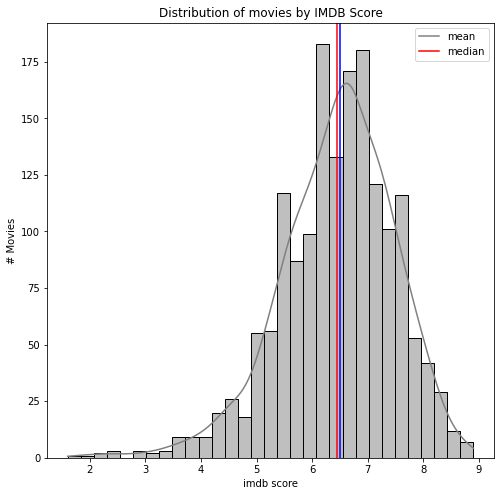

In [192]:
# calculating IMDB Score Distribution

fig, ax = plt.subplots(figsize = (8 ,8))

sns.histplot(data  = movies_da_dropped,
             x     = 'imdb_score'     ,
             bins  = 'fd'             ,
             kde   = True             ,
             color = 'Grey'          )

# title and labels
plt.title ("""Distribution of movies by IMDB Score""")
plt.xlabel("imdb score")
plt.ylabel("# Movies")

# adding mean and median (vertical lines)
plt.axvline (x = movies_da_dropped['imdb_score'].mean(),
             color = 'red')
plt.axvline (x = movies_da_dropped['imdb_score'].median(),
             color = 'blue')

plt.legend (labels = ['mean','median'])

plt.show()

In [147]:
movies_da_dropped['imdb_score'].mean()

6.4479016786570735

In [148]:
movies_da_dropped['imdb_score'].median()

6.5

In [155]:
movies_da_dropped['imdb_score'].value_counts(normalize = False , 
                                             sort      = True  , 
                                             ascending = False )

6.7    86
6.6    85
6.4    68
6.5    65
6.8    65
       ..
1.9     1
2.5     1
3.0     1
8.9     1
1.6     1
Name: imdb_score, Length: 64, dtype: int64

IMDb ratings are based on the votes of the website's users, with a little bit of mathematical re-jigging to stop certain groups disproportionately influencing the vote.
It's a very common metric among users to decide how do they like a movie, and its used afterwards as a indicative for future watchers. 
In this case, we can observe a very normalized distribution with the mean and the median very close to each other (6.5 score).
IMDB ratings are important to the common movie consumer.

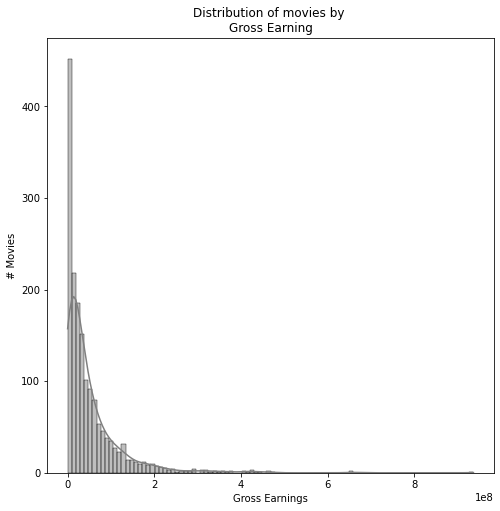

In [193]:
# Gross_Earnings Distribution

fig, ax = plt.subplots(figsize = (8 ,8))

sns.histplot(data  = movies_da       ,
             x     = 'gross_earnings',
             bins  = 'fd'            ,
             kde   = True            ,
             color = 'Grey'         )

# title and labels
plt.title("""Distribution of movies by 
Gross Earning""")
plt.xlabel("Gross Earnings")
plt.ylabel("# Movies")


plt.show()

In [158]:
movies_da_dropped['gross_earnings'].describe()

count    1.668000e+03
mean     5.131354e+07
std      7.301856e+07
min      7.030000e+02
25%      7.571550e+06
50%      2.760743e+07
75%      6.451583e+07
max      9.366274e+08
Name: gross_earnings, dtype: float64

It can be observed that the Gross Earnings (a super important variable to measure profitability) is widely spread (not a normalized Distribution).
Probably we can find a correlation with a different variable later on.

In [142]:
# creating a for loop to group Genres considering only one of them: 'the main' genre.

for i, column in movies_da_dropped.iterrows():
    # conditionals to create the new groups. 
    if "Comedy,"      in  movies_da_dropped.loc[i, 'genre']  or movies_da_dropped.loc[i, 'genre'] == "Comedy":
        movies_da.loc[i, 'genre'] = "Comedy"
        
    elif "Action,"    in  movies_da_dropped.loc[i, 'genre']  or movies_da_dropped.loc[i, 'genre'] == "Action":
        movies_da.loc[i, 'genre'] = "Action"
        
    elif "Adventure," in  movies_da_dropped.loc[i, 'genre']  or movies_da_dropped.loc[i, 'genre'] == "Adventure":
        movies_da.loc[i, 'genre'] = "Adventure"
    
    elif "Crime,"     in  movies_da_dropped.loc[i, 'genre']  or movies_da_dropped.loc[i, 'genre'] == "Crime":
        movies_da.loc[i, 'genre'] = "Crime"
    
    elif "Sci-Fi,"    in  movies_da_dropped.loc[i, 'genre']  or movies_da_dropped.loc[i, 'genre'] == "Sci-Fi":
        movies_da.loc[i, 'genre'] = "Sci-Fi"
    
    elif "Sports,"    in  movies_da_dropped.loc[i, 'genre']  or movies_da_dropped.loc[i, 'genre'] == "Sports":
        movies_da.loc[i, 'genre'] = "Sports"
    
    elif "Romance,"   in  movies_da_dropped.loc[i, 'genre']  or movies_da_dropped.loc[i, 'genre'] == "Romance":
        movies_da.loc[i, 'genre'] = "Romance"
    
    elif "Animation," in  movies_da_dropped.loc[i, 'genre']  or movies_da_dropped.loc[i, 'genre'] == "Animation":
        movies_da.loc[i, 'genre'] = "Animation"
    
    elif "War,"       in  movies_da_dropped.loc[i, 'genre']  or movies_da_dropped.loc[i, 'genre'] == "War":
        movies_da.loc[i, 'genre'] = "War"


    else:
        movies_da_dropped.loc[i, 'genre'] = "Others"
        
movies_da.head(n = 5)

,title,genre,release_year,country,runtime,language,rating,gross_earnings,budget,imdb_score,average_user_rating,num_user_votes
0,The Broadway Melody,Others,1929,USA,100,English,Passed,2808000,379000,6.3,5.7,6605.0
1,42nd Street,Comedy,1933,USA,89,English,Unrated,2300000,439000,7.7,7.4,10926.0
2,Top Hat,Comedy,1935,USA,81,English,Approved,3000000,609000,7.8,7.7,17671.0
3,Gone with the Wind,Others,1939,USA,226,English,G,198655278,3977000,8.2,8.1,293433.0
4,The Best Years of Our Lives,Romance,1946,USA,172,English,Not Rated,23650000,2100000,8.1,8.0,57897.0


We have now a list with only one Genre per movie, assuming that the first one that is showed is the main one.

In [184]:
# understanding how is splitted the movies by ''the main' genre.

movies_da['genre'].value_counts(normalize = True , 
                                sort      = True  , 
                                ascending = False ) 

Action       0.307692
Comedy       0.298748
Others       0.223614
Adventure    0.079308
Crime        0.057841
Romance      0.029815
Sci-Fi       0.002385
Animation    0.000596
Name: genre, dtype: float64

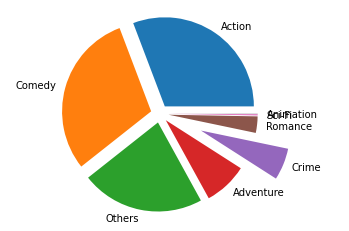

In [190]:
# making 'x' a numerical variable.
x = movies_da['genre'].value_counts(normalize = False , 
                                    sort      = True  , 
                                    ascending = False )

# exploding 'Crime' to highlight the category.
explode        = (0.1     , 0.1    , 0.1    , 0.1       , 0.5   , 0.1     , 0.1    , 0.1       )

plt.pie(x      ,
       labels  = ['Action','Comedy','Others','Adventure','Crime','Romance','Sci-Fi','Animation'],
       explode = explode)

plt.axis('equal')

plt.show()

We can read the big picture and the distribution of our data set, knowing which genres are the more important ones.
We can start looking at crime, which represent almost 6% of the total amount of movies in the dataset.

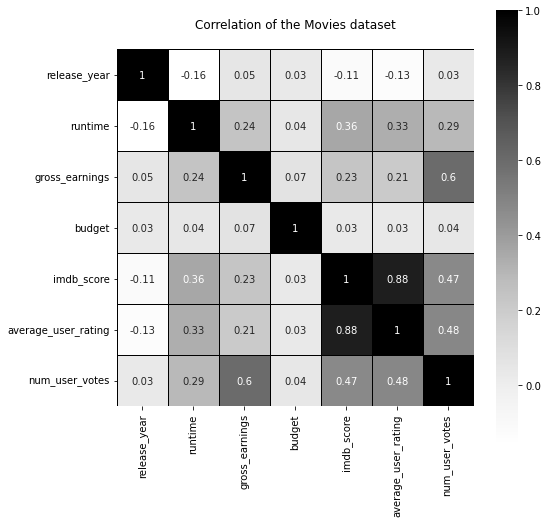

In [186]:
# understanding the correlation among the different variables on the dataset

data_corr = movies_da_dropped.corr(method = 'pearson').round(decimals = 2)

fig, ax = plt.subplots(figsize = (8 ,8))

sns.heatmap( data      = data_corr,
             cmap      = 'Greys'  ,
             square    = True     ,
             annot     = True     ,
             linecolor = 'black'  ,
             linewidth = 0.5      )

plt.title(label = 'Correlation of the Movies dataset\n')

plt.show()

There is no a clear correlation between any of variables on this dataset. The greatest one is between the IMDB score and Average User Rating. There is an apparent consistency on movie users ratings, independent of the platform.         

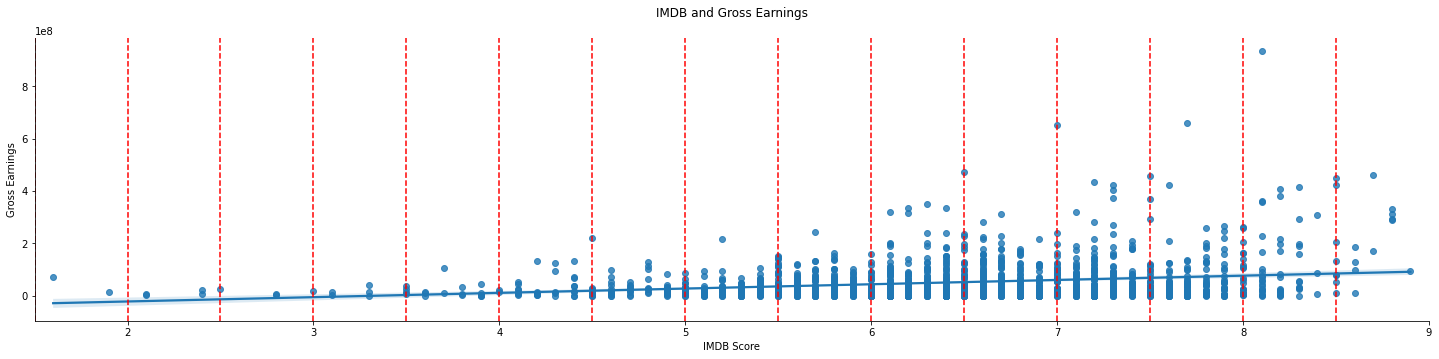

In [139]:
# Scatter plot of IMDB score and Gross Earnings to understand deeper its relationship

sns.lmplot ( x = 'imdb_score',
             y = 'gross_earnings',
             hue        = None,
             scatter    = True, 
             fit_reg    = True, 
             aspect     = 4, 
             data       = movies_da_dropped)


# looping over the x-range to save time
value = 0.5


# looping over the x-range
while value < 9:
    
    # making a vertical line
    plt.axvline(x = value, color = "red", linestyle = '--')
    
    
    # incrementing value in one-quarter increments
    value += 0.5


# formatting and displaying the plot
plt.title       (label  = 'IMDB and Gross Earnings\n')
plt.xlabel      (xlabel = 'IMDB Score'               )
plt.ylabel      (ylabel = 'Gross Earnings'           )
plt.xlim        (left   = 1.5, right = 9             )
plt.tight_layout(pad    = 0.75                       )
plt.show        (block  = True                       )



#Showing the plot
plt.show(block  = True)


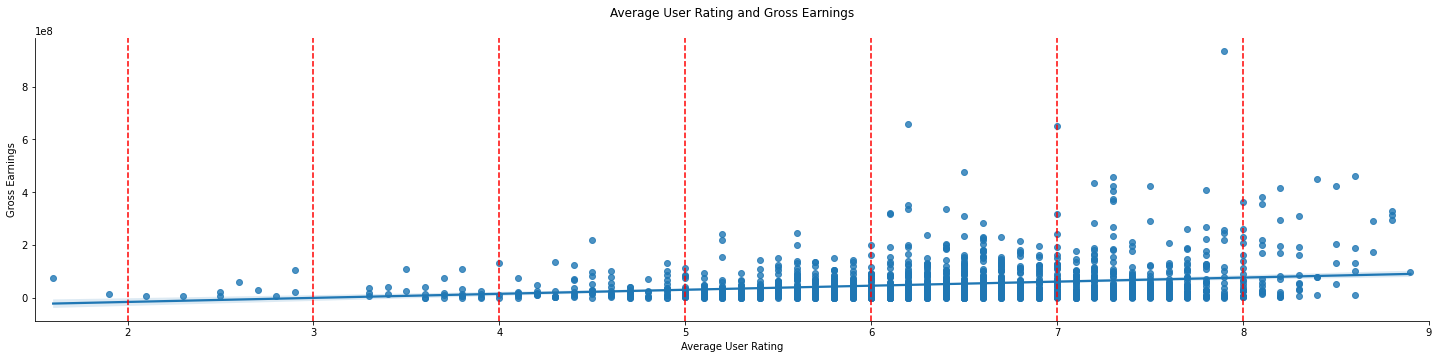

<Figure size 432x288 with 0 Axes>

In [141]:
# Scatter plot of Gross Earnings and Number of User Votes to understand deeper its relationship

sns.lmplot ( x = 'average_user_rating',
             y = 'gross_earnings',
             hue        = None,
             scatter    = True, 
             fit_reg    = True, 
             aspect     = 4, 
             data       = movies_da_dropped)

# looping over the x-range to save time
value = 1


# looping over the x-range
while value < 9:
    
    # making a vertical line
    plt.axvline(x = value, color = "red", linestyle = '--')
    
    
    # incrementing value in one-quarter increments
    value += 1

plt.title       (label  = 'Average User Rating and Gross Earnings\n')
plt.xlabel      (xlabel = 'Average User Rating'                     )
plt.ylabel      (ylabel = 'Gross Earnings'                          )
plt.xlim        (left   = 1.5, right = 9                            )
plt.tight_layout(pad    = 0.75                                      )
plt.show        (block  = True                                      )

plt.tight_layout(pad    = 1)

#Showing the plot
plt.show(block  = True)

It appears that there is a positive correlation, for both IMDB score and Average User Rating, with the gross earnings a movie generates. However, this correlation is not as direct as one could thought. There is a lot of deviation, and we can infer the profitability of a movie is dictated for other factors that are not observable here.

# Entering our genre: Crime

## Introduction

A Crime film is a genre that revolves around the action of a criminal mastermind. A Crime film will often revolve around the criminal himself, chronicling his rise and fall. Some Crime films will have a storyline that follows the criminal's victim, yet others follow the person in pursuit of the criminal.

Some characteristics of a Crime movie could include the following aspects, according to 

1. A significant crime is perhaps the key to any good crime story. The crime is what propels the story forward. 

2. The hero (or heroes) of the crime story is the protagonist. The hero does not have to be likeable but does have to be interesting and intelligent enough to figure out clues and move the story along.

3. The suspects of the crime story are relevant to the story's suspense and intrigue. 

4. The criminal is essential to any good crime fiction. The criminal has to be well matched against his or her opponent - the story's hero. 

5. A realistic or believable story is also necessary to make crime fiction worth watching. 



## Dataset descriptive stats for Crime

In [128]:
# creating a variable to group movies inside the "Crime" genre.
movies_da_crime = movies_da_dropped[movies_da_dropped['genre'].str.contains('Crime')]
movies_da_crime

,title,genre,release_year,country,runtime,language,rating,gross_earnings,budget,imdb_score,average_user_rating,num_user_votes
9,West Side Story,"Crime, Musical",1961,USA,152,English,Unrated,43650000,6000000,7.6,7.5,98217.0
21,Mississippi Mermaid,"Crime, Romance",1969,France,123,French,R,26893,1600000,7.2,7.0,6092.0
27,Sweet Sweetback's Baadasssss Song,"Action, Crime",1971,USA,97,English,R,15180000,500000,5.5,5.5,4668.0
28,Pink Flamingos,"Comedy, Crime",1972,USA,108,English,NC-17,180483,10000,6.1,6.1,22301.0
30,The Sting,"Comedy, Crime",1973,USA,129,English,PG,159600000,5500000,8.3,8.3,244313.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1620,Run All Night,"Action, Crime",2015,USA,114,English,R,26442251,50000000,6.6,6.6,103267.0
1629,The Assassin,"Crime, Mystery",2015,Taiwan,105,Mandarin,Not Rated,613556,15000000,6.4,6.3,421.0
1633,The Hateful Eight,"Crime, Mystery",2015,USA,187,English,R,54116191,44000000,7.9,7.8,527480.0
1660,Money Monster,"Crime, Mystery",2016,USA,98,English,R,41008532,27000000,6.7,6.5,95502.0


In [131]:
movies_da_crime['title'].count()

288

In [100]:
movies_da_crime['genre'].value_counts(normalize = False , 
                                      sort      = True  , 
                                      ascending = False ) 

Action, Crime      103
Comedy, Crime      100
Crime, Thriller     36
Crime, Mystery      19
Crime, Romance      11
Crime, Horror        7
Crime, Music         5
Crime, Musical       4
Crime, History       3
Name: genre, dtype: int64

Its noticeable that Action and Comedy are by far, the favorite co-genres when it comes to a Crime movie.

In [194]:
# understanding how are splitted the movies by 'language'

movies_da_crime['language'].value_counts(normalize = True , 
                                         sort      = True , 
                                         ascending = False)

English     0.972222
French      0.013889
Spanish     0.006944
German      0.003472
Mandarin    0.003472
Name: language, dtype: float64

In [196]:
# understanding how is splitted the movies by ''the main' genre.

movies_da_crime['release_year'].value_counts(normalize = False , 
                                             sort      = True , 
                                             ascending = False)

2001    22
2002    17
2008    17
1999    16
2006    16
1998    15
2013    15
2000    15
2005    14
2009    12
2004    12
2012    10
2010    10
1997     9
2003     9
1996     8
2011     8
2014     8
1995     7
1993     7
2007     7
1994     6
2015     6
1992     6
2016     2
1989     2
1987     2
1969     1
1991     1
1986     1
1984     1
1983     1
1980     1
1973     1
1972     1
1971     1
1961     1
Name: release_year, dtype: int64

In [101]:
# Analyzing the descriptive of Crime movies
movies_da_crime.describe().round(decimals = 2)

,release_year,runtime,gross_earnings,budget,imdb_score,average_user_rating,num_user_votes
count,288.00,288.00,2.880000e+02,2.880000e+02,288.00,288.00,288.00
mean,2002.69,107.82,3.203425e+07,2.755279e+07,6.38,6.34,102758.57
std,8.14,16.46,3.637841e+07,2.387357e+07,0.99,0.99,182582.31
min,1961.00,78.00,3.607000e+03,7.000000e+03,2.40,2.50,9.00
25%,1998.75,96.00,6.047046e+06,9.750000e+06,5.90,5.80,12362.25
50%,2003.00,105.00,1.956891e+07,2.000000e+07,6.40,6.45,43262.00
75%,2008.00,116.25,4.288765e+07,3.850000e+07,7.00,6.90,110973.25
max,2016.00,190.00,1.834058e+08,1.400000e+08,8.60,8.60,1468725.00


We are including every crime movie in its descriptive analysis. There are 288 movies in this data set. Most of them (97%) were filmed in English. The 2000s were ab important era for Crime movies. Normally, a Crime movie last around 108 minutes, being shorter than the average of all genres, 110 minutes. The likeliness is close to 6.4, slightly lower that all genres movies.

## Insights for Crime movies

We are going to analyze the comparison of IMDB scores and Average User Ratings between Crime movies and all genres movies.

In [111]:
# How does your movie genre compare to the other genres in the dataset?


avg_imdb_crime = round(movies_da_crime['imdb_score'].mean(), ndigits = 2)
avg_avg_user_crime = round(movies_da_crime['average_user_rating'].mean(), ndigits = 2)

print(f"""The average IMDB Score for crime movies: {avg_imdb_crime}
The average IMDB Score for all movies: {avg_imdb_movies}
\n""")


The average IMDB Score for crime movies: 6.38
The average IMDB Score for all movies: 6.45




In [112]:
avg_imdb_movies = round(movies_da_dropped['imdb_score'].mean(), ndigits = 2)
avg_user_movies = round(movies_da_dropped['average_user_rating'].mean(), ndigits = 2)

print(f"""The average User Rating Score for crime movies: {avg_avg_user_crime}
The average User Rating Score for all movies: {avg_user_movies}
\n""")

The average User Rating Score for crime movies: 6.34
The average User Rating Score for all movies: 6.41




In [197]:
# comparing earnings per budget, creating a relation metric, to understand the return of investment.

average_budget_crime = round(movies_da_crime['budget'].mean(), ndigits = 2)
average_budget_movies = round(df_dropped['budget'].mean(), ndigits = 2)
average_gross_earn_crime = round(movies_da_crime['gross_earnings'].mean(), ndigits = 2)
average_gross_earn_movies = round(movies_da_dropped['gross_earnings'].mean(), ndigits = 2)

gross_earn_budget_ratio_crime = round(avg_gross_earn_crime / avg_budget_crime, ndigits = 2) # greater earnings
gross_earn_budget_ratio_movies = round(avg_gross_earn_movies / avg_budget_movies, ndigits = 2)

print(f"""The relation between Gross Earnings and Budget for crime movies: {gross_earn_budget_ratio_crime}
The relation between Gross Earnings and Budget for all movies: {gross_earn_budget_ratio_movies}
""")


The relation between Gross Earnings and Budget for crime movies: 1.16
The relation between Gross Earnings and Budget for all movies: 1.04



In [198]:
gross_earn_budget_ratio_crime / gross_earn_budget_ratio_movies

1.1153846153846152

- The relation between the average rating provided by movies consumers for Crime movies and all-genre movies are quite similar, all close to 6.4. There is even a slight difference in favor or all-genre movies.

- There is a bigger return of investment for Crime movies in comparison with all-genres movies. It is 11.5% higher.

- The 2000s were the decade where more of the Crime movies were produced. Most of them were based on True Stories, what appears to be very appealing to the spectators.

## Conclusions

In most years, around 20 per cent of all films are crime movies, and around half of all films have significant crime content.

A 2013 report from the American Academy of Pediatrics found that violence in films has more than doubled since 1950, and gun violence in PG-13-rated films has more than tripled since 1985. The Harvard School of Public Health warned that "ratings creep" has allowed more violent and sexually explicit content into films.


The popularity of true crime dramas is not only because we want to understand what happened and why it happened, it's also because people don't want to be seen as missing out on a huge new drama that we know everyone will be watching.


Seeing violence allows us to reflect on the human condition, an experience we value. Other theories are also out there. “Excitation transfer theory” suggests that watching violence makes us aroused, a feeling that persists until the end of the show, making the end feel more pleasing.



# References

American Academy of Pediatrics (2013)

https://theconversation.com/from-tarantino-to-squid-game-why-do-so-many-people-enjoy-violence-170251